## About Company

Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

## Problem

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

### Data


Variable :Description

Loan_ID :  Unique Loan ID

Gender :    Male/ Female

Married:  Applicant married (Y/N)

Dependents : Number of dependents

Education: Applicant Education (Graduate/ Under Graduate)

Self_Employed: Self employed (Y/N)

ApplicantIncome: Applicant income

CoapplicantIncome: Coapplicant income

LoanAmount: Loan amount in thousands

Loan_Amount_Term : Term of loan in months

Credit_History : credit history meets guidelines

Property_Area : Urban/ Semi Urban/ Rural

Loan_Status : Loan approved (Y/N)



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Vasu\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Stage 1: Data Gathering

In [2]:
train_data=pd.read_csv(r"C:\Users\Vasu\Downloads\great lakes assignments\projects\loan prediction\train_ctrUa4K.csv")
print(train_data.shape)
train_data.head()

(614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Stage 2 : Feature Engineering

In [3]:
train_data.drop('Loan_ID',axis=1,inplace=True)

In [4]:
train_data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
train_data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [7]:
categorical_variables=train_data.select_dtypes(include='object').columns
print(categorical_variables)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')


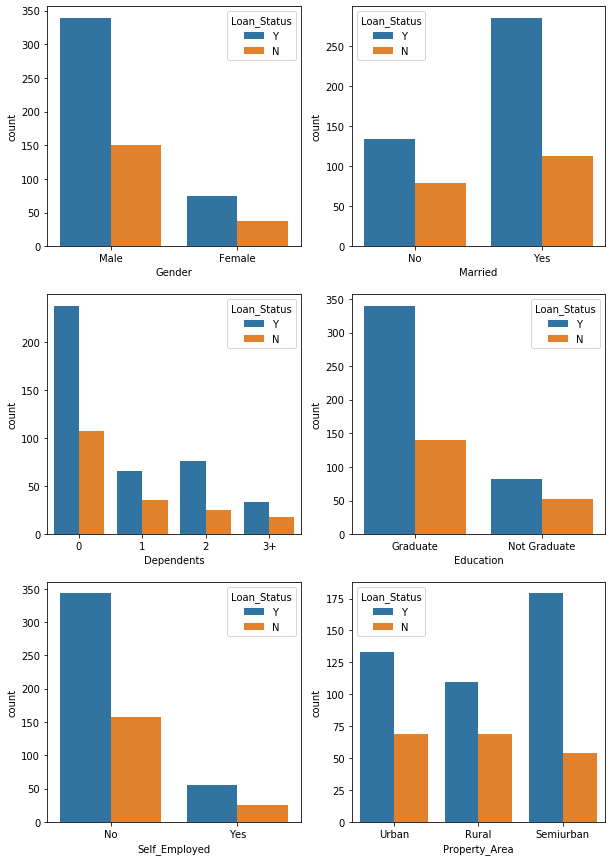

In [8]:
fig,axes=plt.subplots(3,2,figsize=(10,15))
for idx in range(len(categorical_variables)-1):
    row,col=idx//2,idx%2
    sns.countplot(data=train_data,x=categorical_variables[idx],hue='Loan_Status',ax=axes[row,col])  

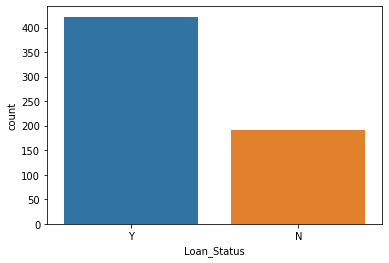

In [9]:
sns.countplot(train_data['Loan_Status']);

## Categorical to numerical:

In [10]:
#sns.catplot(data=train_data,x='Education',y='Self_Employed',hue='Loan_Status')

In [11]:
train_data['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [12]:
train_data['Dependents']=train_data['Dependents'].replace('3+','3')
train_data['Gender']=train_data['Gender'].replace({'Male':0,'Female':1})
train_data['Married']=train_data['Married'].replace({'Yes':1,'No':0})
train_data['Loan_Status']=train_data['Loan_Status'].replace({'Y':1,'N':0})
train_data['Education']=train_data['Education'].replace({'Graduate':1,'Not Graduate':0})
train_data['Self_Employed']=train_data['Self_Employed'].replace({'Yes':1,'No':0})


In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [14]:
train_data['Property_Area']=le.fit_transform(train_data['Property_Area'])

In [15]:
df=train_data[train_data['Loan_Status']==1]

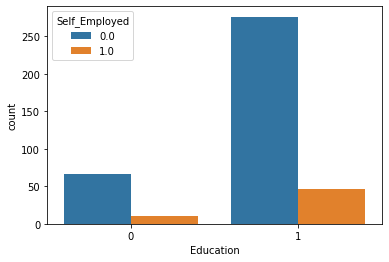

In [16]:
sns.countplot(data=df,x='Education',hue='Self_Employed');

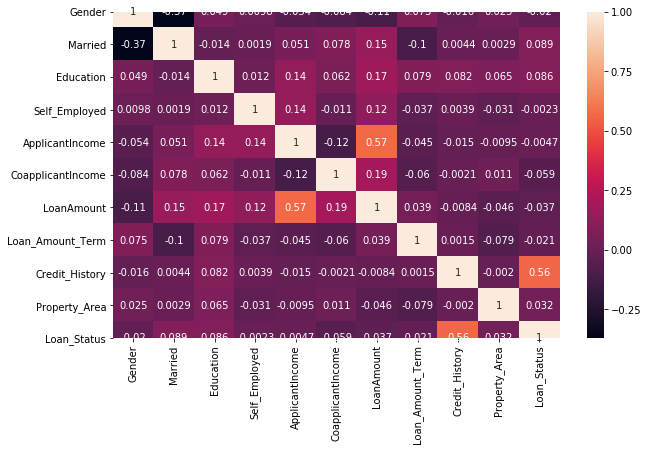

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(train_data.corr(),annot=True);

- The loan amount is given based on the applicant income
- Credit history has a good correlation with the loan status

### Imputation of missing value

In [18]:
import random

In [19]:
values=[0,1]
train_data['Gender'].fillna(random.choice(values),inplace=True)
train_data['Married'].fillna(random.choice(values),inplace=True)
train_data['Self_Employed'].fillna(random.choice(values),inplace=True)


In [20]:
values=[0,1,2,3]
train_data['Dependents'].fillna(random.choice(values),inplace=True)

In [21]:
train_data.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [22]:
train_data.describe()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000,614.000000
mean,0.182410,0.653094,0.781759,0.185668,5403.459283,1621.245798,146.412162,342.00000,0.842199,1.037459,0.687296
std,0.386497,0.476373,0.413389,0.389155,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000,1.000000
75%,0.000000,1.000000,1.000000,0.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000,2.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000,2.000000,1.000000


In [23]:
train_data['Credit_History'].unique()

array([ 1.,  0., nan])

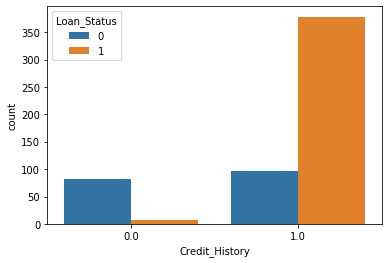

In [24]:
sns.countplot(train_data['Credit_History'],hue=train_data['Loan_Status'])

In [25]:
idx=train_data[(train_data['Credit_History'].isnull()) & (train_data['Loan_Status']==1)].index
for index in idx:
    train_data['Credit_History'].loc[index]=1.0
train_data['Credit_History'].fillna(0,inplace=True)

C:\Users\Vasu\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [26]:
train_data.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [27]:
from sklearn.impute import KNNImputer
knn=KNNImputer(n_neighbors=5)

In [28]:
df_filled=knn.fit_transform(train_data)

In [29]:
df_filled=pd.DataFrame(df_filled,columns=train_data.columns)

In [30]:
df_filled.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,0.0,0.0,1.0,0.0,5849.0,0.0,147.8,360.0,1.0,2.0,1.0
1,0.0,1.0,1.0,1.0,0.0,4583.0,1508.0,128.0,360.0,1.0,0.0,0.0
2,0.0,1.0,0.0,1.0,1.0,3000.0,0.0,66.0,360.0,1.0,2.0,1.0
3,0.0,1.0,0.0,0.0,0.0,2583.0,2358.0,120.0,360.0,1.0,2.0,1.0
4,0.0,0.0,0.0,1.0,0.0,6000.0,0.0,141.0,360.0,1.0,2.0,1.0


In [31]:
df_filled.Credit_History.value_counts()

1.0    512
0.0    102
Name: Credit_History, dtype: int64

In [32]:
df_filled.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Stage 3 : Feature Selection

## Stage 4 : Model Building

In [33]:
df_filled.Loan_Status.value_counts()

1.0    422
0.0    192
Name: Loan_Status, dtype: int64

In [34]:
import statsmodels.api as sm
from statsmodels.tools import add_constant
df_const=add_constant(df_filled)

In [35]:
X=df_const.drop("Loan_Status",axis=1)
y=df_const.Loan_Status
model=sm.Logit(y,X).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.435959
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Loan_Status   No. Observations:                  614
Model:                          Logit   Df Residuals:                      602
Method:                           MLE   Df Model:                           11
Date:                Tue, 02 Jun 2020   Pseudo R-squ.:                  0.2983
Time:                        22:08:47   Log-Likelihood:                -267.68
converged:                       True   LL-Null:                       -381.45
Covariance Type:            nonrobust   LLR p-value:                 1.388e-42
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -3.0198      0.810     -3.726      0.000      -4.608      -1.431
Gender               -0.0067      0.299     -0.022      0.982      -0.592       0.579
Married               0.5816      0.255      2.277      0.023       0.081       1.082
Dependents            0.0693      0.122      0.570      0.569      -0.169       0.308
Education             0.4377      0.267      1.636      0.102      -0.087       0.962
Self_Employed         0.0946      0.288      0.329      0.742      -0.469       0.658
ApplicantIncome    1.028e-05   2.44e-05      0.421      0.674   -3.75e-05    5.81e-05
CoapplicantIncome -3.615e-05   4.04e-05     -0.894      0.371      -0.000    4.31e-05
LoanAmount           -0.0023      0.002     -1.398      0.162      -0.005       0.001
Loan_Amount_Term     -0.0004      0.002     -0.236      0.813      -0.004       0.003
Credit_History        4.1117      0.413      9.949      0.000       3.302       4.922
Property_Area         0.0817      0.141      0.579      0.562      -0.195       0.358
=====================================================================================
"""

### Interpreting the results: Odds Ratio

In [36]:
conf=pd.DataFrame()
conf['Odds Ratio']=round(np.exp(model.params),3)
conf

,Odds Ratio
const,0.049
Gender,0.993
Married,1.789
Dependents,1.072
Education,1.549
Self_Employed,1.099
ApplicantIncome,1.000
CoapplicantIncome,1.000
LoanAmount,0.998
Loan_Amount_Term,1.000


In [37]:
#ODDs Ratio calculation
pd.crosstab(index=df_filled["Credit_History"],columns=df_filled["Loan_Status"])

Loan_Status,0.0,1.0
Credit_History,,
0.0,95,7
1.0,97,415


In [38]:
(415/97)/(7/95)

58.06332842415317

In [39]:
X=X=df_filled.drop("Loan_Status",axis=1)
y=df_filled.Loan_Status

In [40]:
from sklearn.preprocessing import StandardScaler
Xs=StandardScaler().fit_transform(X)

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xs,y,test_size=0.2,random_state=42)

In [42]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model=lr.fit(X_train,y_train)
predictions_lr=lr.predict(X_test)
lr.score(X_test,y_test)

0.8211382113821138

In [43]:
from sklearn.metrics import accuracy_score,r2_score,classification_report,mean_squared_error
print(classification_report(y_test,predictions_lr))

              precision    recall  f1-score   support

         0.0       0.96      0.51      0.67        43
         1.0       0.79      0.99      0.88        80

    accuracy                           0.82       123
   macro avg       0.87      0.75      0.77       123
weighted avg       0.85      0.82      0.80       123



In [44]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(lr,Xs,y,scoring="roc_auc",cv=3)
scores

array([0.75387855, 0.71875   , 0.76305804])

In [45]:
#bias error
np.mean(1-scores)

0.25477113939547447

In [46]:
#variance error
np.std(scores,ddof=1)

0.02338617757529799

Inference:
    - Variance error is much lesser than the bias error.
    - When the new data is predicted the model will perform between 71% and 76% accurately. 

Confusion matrix values
[[22 21]
 [ 1 79]]


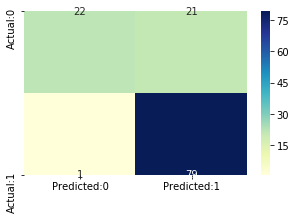

In [47]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions_lr)
print("Confusion matrix values")
print(cm)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (5,3))
sns.heatmap(conf_matrix, annot=True,cmap="YlGnBu")
plt.show()

Inference:
    - Type I error is very high

In [48]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)
accuracy=(TP+TN)/(TP+TN+FP+FN)
misclassification=1-accuracy
print("Accuracy :",accuracy)
print("Misclassification:",misclassification)
print("Sensitivity or True positive rate:",sensitivity)
print("Specificity or True negative rate:",specificity)

Accuracy : 0.8211382113821138
Misclassification: 0.17886178861788615
Sensitivity or True positive rate: 0.9875
Specificity or True negative rate: 0.5116279069767442


In [49]:
print("True positives:",TP)
print("True negatives:",TN)
print("Correct predictions:",TP+TN)
print("False positives:",FP," Type I error")
print("False negatives:",FN," Type II error")

True positives: 79
True negatives: 22
Correct predictions: 101
False positives: 21  Type I error
False negatives: 1  Type II error


Thresolds: [2. 1. 0.]


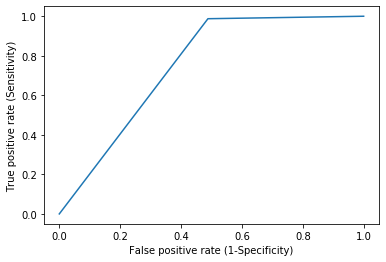

Area under the curve 0.7495639534883721


In [50]:
from sklearn.metrics import roc_auc_score,roc_curve
fpr,tpr,thresolds = roc_curve(y_test,predictions_lr)
print("Thresolds:",thresolds)
plt.plot(fpr,tpr)
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.show()
print("Area under the curve",roc_auc_score(y_test,predictions_lr))

In [51]:
from sklearn.preprocessing import Binarizer

y_pred_proba=model.predict_proba(X_test)

for i in range(1,10):
    cm2=0
    binr=Binarizer(i/10)    
    y_pred=binr.fit_transform(y_pred_proba)[:,1]
    cm2=confusion_matrix(y_test,y_pred)
    print ('With',i/10,'threshold the Confusion Matrix is ','\n',cm2,'\n',
            'with',cm2[0,0]+cm2[1,1],'correct predictions and',cm2[1,0],'Type II errors( False Negatives)','\n\n',
          'Sensitivity: ',cm2[1,1]/(float(cm2[1,1]+cm2[1,0])),'Specificity: ',cm2[0,0]/(float(cm2[0,0]+cm2[0,1])),'\n\n\n')
    

With 0.1 threshold the Confusion Matrix is  
 [[12 31]
 [ 1 79]] 
 with 91 correct predictions and 1 Type II errors( False Negatives) 

 Sensitivity:  0.9875 Specificity:  0.27906976744186046 



With 0.2 threshold the Confusion Matrix is  
 [[22 21]
 [ 1 79]] 
 with 101 correct predictions and 1 Type II errors( False Negatives) 

 Sensitivity:  0.9875 Specificity:  0.5116279069767442 



With 0.3 threshold the Confusion Matrix is  
 [[22 21]
 [ 1 79]] 
 with 101 correct predictions and 1 Type II errors( False Negatives) 

 Sensitivity:  0.9875 Specificity:  0.5116279069767442 



With 0.4 threshold the Confusion Matrix is  
 [[22 21]
 [ 1 79]] 
 with 101 correct predictions and 1 Type II errors( False Negatives) 

 Sensitivity:  0.9875 Specificity:  0.5116279069767442 



With 0.5 threshold the Confusion Matrix is  
 [[22 21]
 [ 1 79]] 
 with 101 correct predictions and 1 Type II errors( False Negatives) 

 Sensitivity:  0.9875 Specificity:  0.5116279069767442 



With 0.6 threshold t

In [52]:
from sklearn.preprocessing import Binarizer

y_pred_proba=model.predict_proba(X_test)

for i in range(60,71):
    cm2=0
    binr=Binarizer(i/100)    
    y_pred=binr.fit_transform(y_pred_proba)[:,1]
    cm2=confusion_matrix(y_test,y_pred)
    print ('With',i/100,'threshold the Confusion Matrix is ','\n',cm2,'\n',
            'with',cm2[0,0]+cm2[1,1],'correct predictions and',cm2[1,0],'Type II errors( False Negatives)','\n\n',
          'Sensitivity: ',cm2[1,1]/(float(cm2[1,1]+cm2[1,0])),'Specificity: ',cm2[0,0]/(float(cm2[0,0]+cm2[0,1])),'\n\n\n')

With 0.6 threshold the Confusion Matrix is  
 [[22 21]
 [ 1 79]] 
 with 101 correct predictions and 1 Type II errors( False Negatives) 

 Sensitivity:  0.9875 Specificity:  0.5116279069767442 



With 0.61 threshold the Confusion Matrix is  
 [[22 21]
 [ 1 79]] 
 with 101 correct predictions and 1 Type II errors( False Negatives) 

 Sensitivity:  0.9875 Specificity:  0.5116279069767442 



With 0.62 threshold the Confusion Matrix is  
 [[22 21]
 [ 1 79]] 
 with 101 correct predictions and 1 Type II errors( False Negatives) 

 Sensitivity:  0.9875 Specificity:  0.5116279069767442 



With 0.63 threshold the Confusion Matrix is  
 [[22 21]
 [ 1 79]] 
 with 101 correct predictions and 1 Type II errors( False Negatives) 

 Sensitivity:  0.9875 Specificity:  0.5116279069767442 



With 0.64 threshold the Confusion Matrix is  
 [[22 21]
 [ 1 79]] 
 with 101 correct predictions and 1 Type II errors( False Negatives) 

 Sensitivity:  0.9875 Specificity:  0.5116279069767442 



With 0.65 thresh

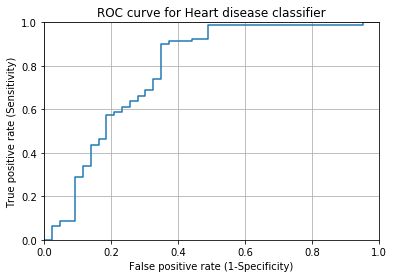

In [53]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [54]:
roc_auc_score(y_test,y_pred_proba[:,1])

0.7790697674418605

### Area Under The Curve (AUC)

- The area under the ROC curve quantifies model classification accuracy ; the higher the area, the greater the disparity between true and false positives, and the stronger the model in classifying members of the training dataset.
- An area of 0.5 corresponds to a model that performs no better than random classification and a good classifier stays as far away from that  as possible. An area of 1 is ideal. 
- The closer the AUC to 1 the better.

### Test data 

In [55]:
test_data=pd.read_csv(r"C:\Users\Vasu\Downloads\great lakes assignments\projects\loan prediction\test_lAUu6dG.csv")

In [56]:
test_data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [57]:
Loan_ID=test_data.drop("Loan_ID",axis=1,inplace=True)

In [58]:
categorical_variables=test_data.select_dtypes(include='object').columns
test_data['Dependents']=test_data['Dependents'].replace('3+','3')
test_data['Gender']=test_data['Gender'].replace({'Male':0,'Female':1})
test_data['Married']=test_data['Married'].replace({'Yes':1,'No':0})
test_data['Education']=test_data['Education'].replace({'Graduate':1,'Not Graduate':0})
test_data['Self_Employed']=test_data['Self_Employed'].replace({'Yes':1,'No':0})
test_data['Property_Area']=le.fit_transform(test_data['Property_Area'])

In [59]:
values=[0,1]
test_data['Gender'].fillna(random.choice(values),inplace=True)
test_data['Self_Employed'].fillna(random.choice(values),inplace=True)

In [60]:
values=[0,1,2,3]
test_data['Dependents'].fillna(random.choice(values),inplace=True)

In [61]:
df_filled_test=knn.fit_transform(test_data)
df_filled_test=pd.DataFrame(df_filled_test,columns=test_data.columns)

In [62]:
predictions=lr.predict(df_filled_test)

In [63]:
sample=pd.read_csv("sample_submission_49d68Cx.csv")
sample.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [64]:
sample["Loan"]=lr.predict(df_filled_test)
sample["Loan"]=sample["Loan"].replace({0.0:'N',1.0:'Y'})
sample.drop('Loan_Status',axis=1,inplace=True)

In [65]:
sample.rename(columns={"Loan":"Loan_Status"},inplace=True)
sample.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [66]:
sample.to_csv('sample_submission_49d68Cx.csv',index=False)

### Final Insights:

    - Credit history has a major part in predicting if the loan is to be approved or not.
    - Based on the income of the person , loan amount is set.
    - The area under the curve is 77.7 which is somewhat satisfactory.
    - Overall the model requires a lot of improvement in order to reduce the FP and increase the accuracy levels.